A general approach for checking Document similarity is to _shingle_ the document (or create _k-grams_). This takes consecutive words and group them as a single object. A k-gram is a consecutive set of k words. So the set of all 1-grams is exactly the bag of words model. An alternative name to k-gram is a k-shingle; these mean the same thing.
>D1: I am Sam.

>D2: Sam I am.

>D3 : I do not like green eggs and ham. 

>D4: I do not like them, Sam I am.

The $(k=1)$-grams of $D1\cup D2\cup D3\cup D4$ are: 
#### { [I], [am], [Sam], [do], [not], [like], [green], [eggs], [and], [ham], [them] }

The $(k=2)$-grams of $D1\cup D2\cup D3 \cup D4$ are: 
#### { [I am], [am Sam], [Sam Sam], [Sam I], [am I], [I do], [do not], [not like], [like green], [green eggs], [eggs and], [and ham], [like them], [them Sam] }
The set of $k$-grams of a document with $n$ words is at most $n − k$. The takes space $O(kn)$ to store them all. If $k $ is small, this is not a high overhead. Furthermore, the space goes down as items are repeated.


In [51]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# For the example here, we are assuming space as an unique character, 
# Also capital letters are different than lower cased letters

In [11]:
# Ex. "I am Sam" = { ['I '], [' a'], ['am'], ['m '], [' S'], ['Sa'], ['am']}
def twoCharGram(dataset):
    with open(dataset, 'r') as data:
        textFile = data.read().replace('\n', ' ')
        kGrams = set()
        # 2-Char gram
        for i in range(len(textFile)-1):
            if textFile[i] + textFile[i+1] not in kGrams:
                kGrams.add(textFile[i] + textFile[i+1])
    return kGrams

In [22]:
# Ex. "I am Sam" = { ['I a'], [' am'], ['am '], ['m S'], [' Sa'], ['Sam']}
def threeCharGram(dataset):
    with open(dataset, 'r') as data:
        textFile = data.read().replace('\n', ' ')
        kGrams = set()
        # 3-Char gram
        for i in range(len(textFile)-2):
            if textFile[i] + textFile[i+1] + textFile[i+2] not in kGrams:
                kGrams.add(textFile[i] + textFile[i+1] + textFile[i+2])
    return kGrams

In [26]:
# Ex. "I am Sam" = { ['I am'], ['am Sam']}
def twoWordGram(dataset):
    with open(dataset, 'r') as data:
        tokens = str.split(data.read().replace('\n', ' '))
        kGrams = set()
        #2-word gram
        for i in range(len(tokens)-1):
            if tokens[i] + ' ' + tokens[i+1] not in kGrams:
                kGrams.add(tokens[i] + ' ' + tokens[i+1])
    return kGrams

In [19]:
for dataset in ['D1.txt','D2.txt','D3.txt','D4.txt']:
    print(dataset + ' two char gram size: %d' % len(twoCharGram('documents/'+dataset)))
        

D1.txt two char gram size: 263
D2.txt two char gram size: 262
D3.txt two char gram size: 269
D4.txt two char gram size: 255


In [23]:
for dataset in ['D1.txt','D2.txt','D3.txt','D4.txt']:
    print(dataset + ' three char gram size: %d' % len(threeCharGram('documents/'+dataset)))

D1.txt three char gram size: 765
D2.txt three char gram size: 762
D3.txt three char gram size: 828
D4.txt three char gram size: 698


In [27]:
for dataset in ['D1.txt','D2.txt','D3.txt','D4.txt']:
    print(dataset + ' two word gram size: %d' % len(twoWordGram('documents/'+dataset)))

D1.txt two word gram size: 279
D2.txt two word gram size: 278
D3.txt two word gram size: 337
D4.txt two word gram size: 232


## Jaccard Similarity

In [44]:
def jaccard(d1,d2,d3,d4, message):
    print('D1.txt\'s '+ message +' similarity with D2.txt is: %.6f percent' % (100.* len(D1set.intersection(D2set))/ len(D1set.union(D2set))))
    print('D1.txt\'s '+ message +' similarity with D3.txt is: %.6f percent' % (100.* len(D1set.intersection(D3set))/ len(D1set.union(D3set))))
    print('D1.txt\'s '+ message +' similarity with D4.txt is: %.6f percent' % (100.* len(D1set.intersection(D4set))/ len(D1set.union(D4set))))
    print('D2.txt\'s '+ message +' similarity with D3.txt is: %.6f percent' % (100.* len(D2set.intersection(D3set))/ len(D2set.union(D3set))))
    print('D2.txt\'s '+ message +' similarity with D4.txt is: %.6f percent' % (100.* len(D2set.intersection(D4set))/ len(D2set.union(D4set))))
    print('D3.txt\'s '+ message +' similarity with D4.txt is: %.6f percent' % (100.* len(D3set.intersection(D4set))/ len(D3set.union(D4set))))

In [45]:
D1set = twoCharGram('documents/D1.txt')
D2set = twoCharGram('documents/D2.txt')
D3set = twoCharGram('documents/D3.txt')
D4set = twoCharGram('documents/D4.txt')
jaccard(D1set,D2set,D3set,D4set, 'two char gram')

D1.txt's two char gram similarity with D2.txt is: 98.113208 percent
D1.txt's two char gram similarity with D3.txt is: 81.569966 percent
D1.txt's two char gram similarity with D4.txt is: 64.444444 percent
D2.txt's two char gram similarity with D3.txt is: 80.000000 percent
D2.txt's two char gram similarity with D4.txt is: 64.126984 percent
D3.txt's two char gram similarity with D4.txt is: 65.299685 percent


In [46]:
D1set = threeCharGram('documents/D1.txt')
D2set = threeCharGram('documents/D2.txt')
D3set = threeCharGram('documents/D3.txt')
D4set = threeCharGram('documents/D4.txt')
jaccard(D1set,D2set,D3set,D4set, 'two char gram')

D1.txt's two char gram similarity with D2.txt is: 97.797927 percent
D1.txt's two char gram similarity with D3.txt is: 58.035714 percent
D1.txt's two char gram similarity with D4.txt is: 30.508475 percent
D2.txt's two char gram similarity with D3.txt is: 56.804734 percent
D2.txt's two char gram similarity with D4.txt is: 30.590340 percent
D3.txt's two char gram similarity with D4.txt is: 31.212382 percent


In [47]:
D1set = twoWordGram('documents/D1.txt')
D2set = twoWordGram('documents/D2.txt')
D3set = twoWordGram('documents/D3.txt')
D4set = twoWordGram('documents/D4.txt')
jaccard(D1set,D2set,D3set,D4set, 'two char gram')

D1.txt's two char gram similarity with D2.txt is: 94.076655 percent
D1.txt's two char gram similarity with D3.txt is: 18.234165 percent
D1.txt's two char gram similarity with D4.txt is: 3.024194 percent
D2.txt's two char gram similarity with D3.txt is: 17.366412 percent
D2.txt's two char gram similarity with D4.txt is: 3.030303 percent
D3.txt's two char gram similarity with D4.txt is: 1.607143 percent


## Minhashing

In [48]:
D1Gram = threeCharGram('documents/D1.txt')
D2Gram = threeCharGram('documents/D2.txt')
DTotal = list(D1Gram.union(D2Gram))

In [49]:
import math
for k in [20,60,150,300,600]:    
    successCounter = 0
    for t in range (k):
        minNum = [math.inf, math.inf]
        for i in range (len(DTotal)):
            current = hash(str(t)+DTotal[i]+str(t)) % 10000
            if DTotal[i] in D1Gram: # this is how we'll emulate the vector representation of this D1
                if (current < minNum[0]):
                    minNum[0] = current
            if DTotal[i] in D2Gram: # this is how we'll emulate the vector representation of this D2
                if (current < minNum[1]):
                    minNum[1] = current
        if minNum[0] == minNum[1]:
            successCounter = successCounter+1
    print("with t = %d"%k, " we get a minhash similarity of ", successCounter/k)

with t = 20  we get a minhash similarity of  0.95
with t = 60  we get a minhash similarity of  0.9666666666666667
with t = 150  we get a minhash similarity of  0.9866666666666667
with t = 300  we get a minhash similarity of  0.9833333333333333
with t = 600  we get a minhash similarity of  0.9683333333333334


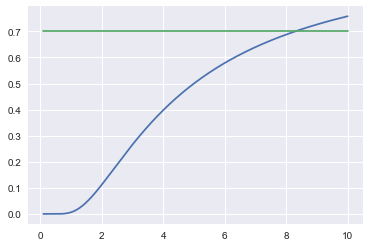

In [52]:
x = np.linspace(0.1, 10, 1000)
y = np.zeros_like(x)
z = np.zeros_like(x)
for k in range(len(y)):
    y[k] = math.pow(160/x[k],-1/x[k])
    z[k] = 0.7 #tau
sns.set()
plt.plot(x, y)
plt.plot(x, z)
plt.show()
# this shows us what the b value would begiven tau = 0.7

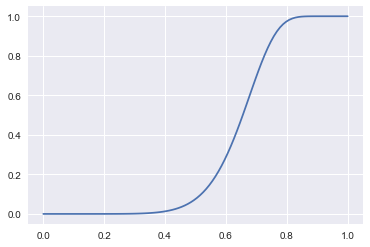

In [53]:
x = np.linspace(0, 1, 100)
y = np.zeros_like(x)
t = 160
b = 8
r = t/b
for k in range(len(y)):
    y[k] = 1- math.pow(1-math.pow(x[k],b),r)
sns.set()
plt.plot(x, y)
plt.show()